In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import matplotlib as mpl
import scipy.stats as stats 

from IPython.display import set_matplotlib_formats

mpl.rc('font', family='Malgun Gothic')
mpl.rc('axes', unicode_minus =True)
set_matplotlib_formats('retina')
pd.options.display.max_columns = 100
pd.options.display.max_rows = 1000
import warnings 
warnings.filterwarnings('ignore')


# 학습/검증 데이터 분할 / 매개변수 튜닝 / 교차검증 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
# 평가 
from sklearn.metrics import classification_report
from IPython.display import Image
import pandas as pd
import numpy as np
import pydotplus

import os
os.environ['PATH'] += os.pathsep + 'C:/Program Files/Graphviz/bin'

C:\Users\user\AppData\Local\Temp/ipykernel_4592/2658850191.py:12: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina')


In [2]:
from sklearn.datasets import load_iris

In [3]:
iris =load_iris()

In [4]:
#iris = pd.DataFrame(np.c_[iris['data'],iris['target']],columns=iris['feature_names']+['target'])

In [5]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [6]:
X_train = iris.data[:-30]
y_train=iris.target[:-30]
X_test=iris.data[-30:]
y_test=iris.target[-30:]

In [7]:
print(y_train)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2]


In [8]:
print(y_test)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [9]:
from sklearn.ensemble import RandomForestClassifier

In [10]:
# 트리개수 20으로 설정
rfc= RandomForestClassifier(n_estimators=20)

In [11]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=20)

In [12]:
prediction=rfc.predict(X_test)

In [13]:
rfc.score(X_test,y_test)

0.7333333333333333

In [14]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
print('accuracy score: ', accuracy_score(prediction,y_test))
print(classification_report(y_test,prediction))

accuracy score:  0.7333333333333333
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           2       1.00      0.73      0.85        30

    accuracy                           0.73        30
   macro avg       0.50      0.37      0.42        30
weighted avg       1.00      0.73      0.85        30



In [15]:
x=iris.data
y=iris.target

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [18]:
rfc.fit(x_train,y_train)

RandomForestClassifier(n_estimators=20)

In [19]:
rfc.estimators_[8]

DecisionTreeClassifier(max_features='auto', random_state=411487387)

In [20]:
from sklearn import tree

In [21]:
tree.export_graphviz(
   rfc.estimators_[8]
,feature_names=["sepal length", "sepal width","petal length", "petal width" ]
,class_names =["setosa", "virsicolor", "virsinica"]
)

'digraph Tree {\nnode [shape=box] ;\n0 [label="petal width <= 0.8\\ngini = 0.664\\nsamples = 76\\nvalue = [41, 35, 44]\\nclass = virsinica"] ;\n1 [label="gini = 0.0\\nsamples = 26\\nvalue = [41, 0, 0]\\nclass = setosa"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="petal width <= 1.7\\ngini = 0.494\\nsamples = 50\\nvalue = [0, 35, 44]\\nclass = virsinica"] ;\n0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n3 [label="petal length <= 4.95\\ngini = 0.25\\nsamples = 28\\nvalue = [0, 35, 6]\\nclass = virsicolor"] ;\n2 -> 3 ;\n4 [label="gini = 0.0\\nsamples = 23\\nvalue = [0, 34, 0]\\nclass = virsicolor"] ;\n3 -> 4 ;\n5 [label="petal width <= 1.55\\ngini = 0.245\\nsamples = 5\\nvalue = [0, 1, 6]\\nclass = virsinica"] ;\n3 -> 5 ;\n6 [label="gini = 0.0\\nsamples = 3\\nvalue = [0, 0, 5]\\nclass = virsinica"] ;\n5 -> 6 ;\n7 [label="sepal width <= 2.85\\ngini = 0.5\\nsamples = 2\\nvalue = [0, 1, 1]\\nclass = virsicolor"] ;\n5 -> 7 ;\n8 [label="gini =

In [22]:
 dt_dot_data   = tree.export_graphviz(
                        rfc.estimators_[8]
                        ,feature_names=["sepal length", "sepal width","petal length", "petal width" ]
                        ,class_names =["setosa", "virsicolor", "virsinica"]
                        )

In [23]:
dt_dot_data

'digraph Tree {\nnode [shape=box] ;\n0 [label="petal width <= 0.8\\ngini = 0.664\\nsamples = 76\\nvalue = [41, 35, 44]\\nclass = virsinica"] ;\n1 [label="gini = 0.0\\nsamples = 26\\nvalue = [41, 0, 0]\\nclass = setosa"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="petal width <= 1.7\\ngini = 0.494\\nsamples = 50\\nvalue = [0, 35, 44]\\nclass = virsinica"] ;\n0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n3 [label="petal length <= 4.95\\ngini = 0.25\\nsamples = 28\\nvalue = [0, 35, 6]\\nclass = virsicolor"] ;\n2 -> 3 ;\n4 [label="gini = 0.0\\nsamples = 23\\nvalue = [0, 34, 0]\\nclass = virsicolor"] ;\n3 -> 4 ;\n5 [label="petal width <= 1.55\\ngini = 0.245\\nsamples = 5\\nvalue = [0, 1, 6]\\nclass = virsinica"] ;\n3 -> 5 ;\n6 [label="gini = 0.0\\nsamples = 3\\nvalue = [0, 0, 5]\\nclass = virsinica"] ;\n5 -> 6 ;\n7 [label="sepal width <= 2.85\\ngini = 0.5\\nsamples = 2\\nvalue = [0, 1, 1]\\nclass = virsicolor"] ;\n5 -> 7 ;\n8 [label="gini =

In [24]:
pydotplus.graph_from_dot_data(dt_dot_data)

In [25]:
dt_graph = pydotplus.graph_from_dot_data(dt_dot_data)

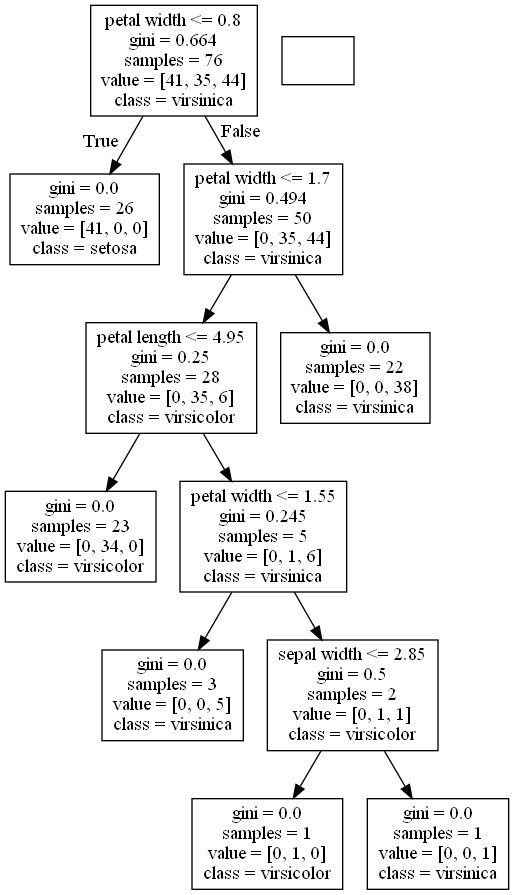

In [26]:
Image(dt_graph.create_png())